In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    recall = []  
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))  
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "Recall": np.mean(recall), 
        "ROC-AUC": np.mean(roc_auc),
    }

# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Skalierung der Features (X) mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normiert X auf den Standardbereich (Mittelwert = 0, Std = 1)

    # Modelle definieren
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1,random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(random_state=42),
    }

    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_scaled, y)  
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Logistic Regression
Modell wird validiert: Decision Tree
Modell wird validiert: Random Forest
Modell wird validiert: Gradient Boosting
Modell wird validiert: XGBoost
Modell wird validiert: LightGBM
Modell wird validiert: SVC
Modell wird validiert: k-Nearest Neighbors
Modell wird validiert: MLP Classifier
Modell wird validiert: Gaussian Naive Bayes
Modell wird validiert: Linear Discriminant Analysis
Modell wird validiert: Quadratic Discriminant Analysis


C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Varia

Modell wird validiert: Bagging Classifier
Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
                              Model  Train Accuracy  Test Accuracy  F1-Score    Recall   ROC-AUC
0               Logistic Regression        1.000000       0.882530  0.885185  0.863462  0.970874
8                    MLP Classifier        1.000000       0.866443  0.873470  0.865641  0.951640
6                               SVC        0.978547       0.843478  0.854822  0.857436  0.938984
4                           XGBoost        1.000000       0.830040  0.834000  0.801282  0.931310
13                      Extra Trees        1.000000       0.830435  0.841607  0.840000  0.925927
3                 Gradient Boosting        1.000000       0.833755  0.841764  0.819359  0.922178
2                     Random Forest        1.000000       0.821344  0.831655  0.821538  0.918608
5                          LightGBM        1.000000       0.815889  0.820686  0.793077  0.912572
9              Gaussian N

Feature Selektion auf Basis von Feature Importance (Random Forest) und Korrelationsmatrix r < 0,7

Hochkorrelierte Features (r > 0.7):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Jump Height impulse mit Korrelation: 0.71
CMJ_Jump Height flighttime und CMJ_RSI (impulse) mit Korrelation: 0.77
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Peak Loading Force-Mittelwert [N] mit Korrelation: 0.70
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flight

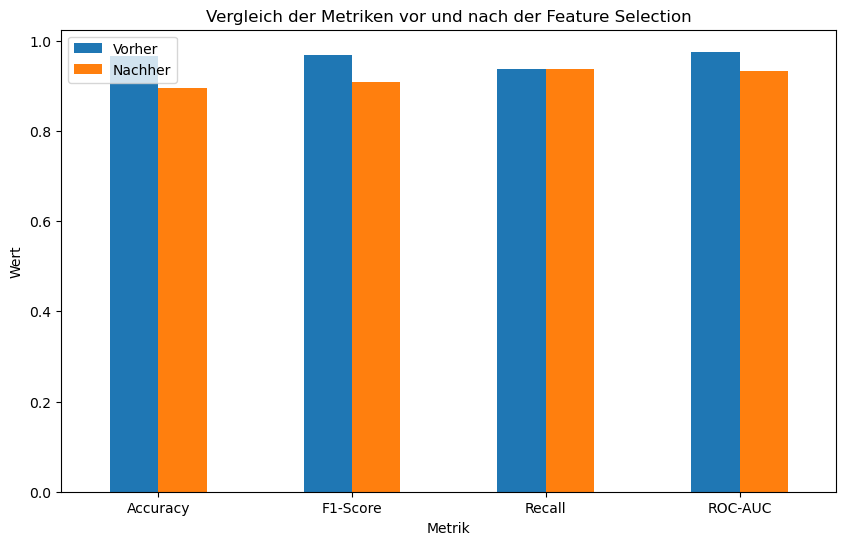

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))
X_test_scaled = scaler.transform(X_test.drop(columns=dummy_columns))

# Dummies wieder hinzufügen
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Bereite X_train_final und X_test_final vor
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
X_test_final = np.array(X_test_final)   # Für spätere Validierung
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Erstelle DataFrame mit Feature-Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Datensatz
df_reduced = df.drop(columns=features_to_drop)

# Speichere den gesamten reduzierten Datensatz
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_korr_70_feature_importance.xlsx"
df_reduced.to_excel(output_path, index=False)
print(f"Der gesamte reduzierte Datensatz wurde unter folgendem Pfad gespeichert: {output_path}")

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection
train_metrics_original, test_metrics_original = validate_feature_selection(
    rf, 
    X_train_final, 
    y_train, 
    X_test_final, 
    y_test
)

# Reduziertes Training und Test-Set erstellen (nur reduzierte Features verwenden)
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Skalierung der reduzierten numerischen Features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced.drop(columns=dummy_columns))
X_test_reduced_scaled = scaler.transform(X_test_reduced.drop(columns=dummy_columns))
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, X_train_reduced[dummy_columns].values], axis=1)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test_reduced[dummy_columns].values], axis=1)

# Validierung nach der Feature Selection
train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original["Test Accuracy"], 
        test_metrics_original["F1-Score"], 
        test_metrics_original["Recall"], 
        test_metrics_original["ROC-AUC"]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)

# Visualisierung des Vergleichs
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


Feature Selektion auf Basis von Feature Importance (Random Forest) und Korrelationsmatrix r < 0,8 

Hochkorrelierte Features (r > 0.8):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Net

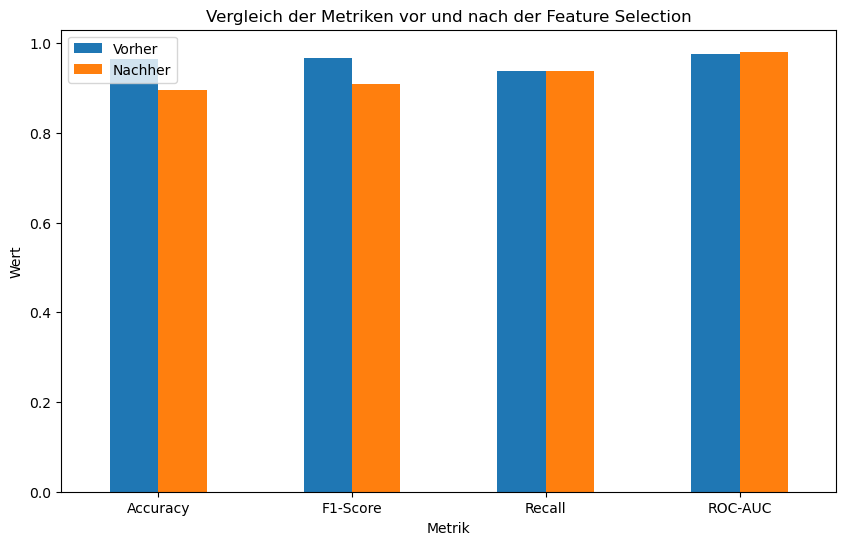

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))
X_test_scaled = scaler.transform(X_test.drop(columns=dummy_columns))

# Dummies wieder hinzufügen
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Bereite X_train_final und X_test_final vor
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
X_test_final = np.array(X_test_final)   # Für spätere Validierung
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Erstelle DataFrame mit Feature-Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.8):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Datensatz
df_reduced = df.drop(columns=features_to_drop)

# Speichere den gesamten reduzierten Datensatz
output_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_korr_80_feature_importance.xlsx"
df_reduced.to_excel(output_path, index=False)
print(f"Der gesamte reduzierte Datensatz wurde unter folgendem Pfad gespeichert: {output_path}")

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection
train_metrics_original, test_metrics_original = validate_feature_selection(
    rf, 
    X_train_final, 
    y_train, 
    X_test_final, 
    y_test
)

# Reduziertes Training und Test-Set erstellen (nur reduzierte Features verwenden)
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Skalierung der reduzierten numerischen Features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced.drop(columns=dummy_columns))
X_test_reduced_scaled = scaler.transform(X_test_reduced.drop(columns=dummy_columns))
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, X_train_reduced[dummy_columns].values], axis=1)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test_reduced[dummy_columns].values], axis=1)

# Validierung nach der Feature Selection
train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Test-Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original["Test Accuracy"], 
        test_metrics_original["F1-Score"], 
        test_metrics_original["Recall"], 
        test_metrics_original["ROC-AUC"]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)

# Visualisierung des Vergleichs
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split (der Testdatensatz bleibt zu diesem Zeitpunkt noch "ungesehen")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))

# Dummies wieder hinzufügen (nur für Training)
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature-Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Entferne identifizierte Features aus dem gesamten Trainingsdatensatz
df_reduced = df.drop(columns=features_to_drop)

# Re-Skalierung der reduzierten Trainingsdaten
X_train_reduced = df_reduced.drop(columns=['Verletzungsstatus', 'Geschlecht_weiblich'])
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)

# Dummies wieder hinzufügen (nur für Training)
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, df_reduced[dummy_columns].values], axis=1)

# Funktion zur Validierung der Feature Selection
def validate_feature_selection(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train)
    
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_pred_prob_test)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection mit Repeated Stratified CV
train_metrics_original = []
test_metrics_original = []
for train_idx, test_idx in cv.split(X_train_final, y_train):
    X_train_cv, X_test_cv = X_train_final[train_idx], X_train_final[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    
    # Training und Metriken berechnen
    rf.fit(X_train_cv, y_train_cv)
    y_train_pred = rf.predict(X_train_cv)
    y_test_pred = rf.predict(X_test_cv)
    
    train_metrics_original.append(accuracy_score(y_train_cv, y_train_pred))
    test_metrics_original.append(accuracy_score(y_test_cv, y_test_pred))

# Metriken für den Trainingsdatensatz mit Cross-Validation
train_accuracy_cv = np.mean(train_metrics_original)
test_accuracy_cv = np.mean(test_metrics_original)

print(f"Train Accuracy mit Cross-Validation: {train_accuracy_cv:.4f}")
print(f"Test Accuracy mit Cross-Validation: {test_accuracy_cv:.4f}")

# Validierung nach der Feature Selection
X_test_reduced = X_test.drop(columns=features_to_drop)
X_test_reduced_scaled = scaler.transform(X_test_reduced)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test[dummy_columns].values], axis=1)

train_metrics_reduced, test_metrics_reduced = validate_feature_selection(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Test-Accuracy", "F1-Score", "Recall", "ROC-AUC"],
    "Vorher": [
        test_metrics_original[0],  # Vor der Feature Selection (Mittelwert)
        test_metrics_original[1], 
        test_metrics_original[2], 
        test_metrics_original[3]
    ],
    "Nachher": [
        test_metrics_reduced["Test Accuracy"], 
        test_metrics_reduced["F1-Score"], 
        test_metrics_reduced["Recall"], 
        test_metrics_reduced["ROC-AUC"]
    ]
})
print(metrics_comparison)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_alle_PostOP\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Dummy-Spalte für das Geschlecht (nicht normalisieren)
dummy_columns = ['Geschlecht_weiblich']
X_dummies = X[dummy_columns]
X_numerical = X.drop(columns=dummy_columns)

# Train-Test-Split (der Testdatensatz bleibt zu diesem Zeitpunkt noch "ungesehen")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Skalierung der numerischen Features im Trainingsdatensatz
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=dummy_columns))

# Dummies wieder hinzufügen (nur für Training)
X_train_final = np.concatenate([X_train_scaled, X_train[dummy_columns].values], axis=1)

# Stellt sicher, dass X_train_final, X_test_final und y_train NumPy-Arrays sind
X_train_final = np.array(X_train_final)  # Für die Cross-Validation
y_train = np.array(y_train)             # Für die Cross-Validation

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Repeated Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature-Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    y = np.array(y)  # Konvertiere y in ein NumPy-Array
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        feature_importances += model.feature_importances_
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_train_final, y_train, rf, cv)

# Korrelationsmatrix berechnen
correlation_matrix = X_numerical.corr()

# Identifiziere hochkorrelierte Features
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], corr_value))

# Hochkorrelierte Features filtern
features_to_drop = set()
for feature1, feature2, corr_value in high_corr_pairs:
    # Bestimme das Feature mit der geringeren Importance
    importance1 = feature_importance_df.loc[feature_importance_df['Feature'] == feature1, 'Importance'].values[0]
    importance2 = feature_importance_df.loc[feature_importance_df['Feature'] == feature2, 'Importance'].values[0]
    
    if importance1 < importance2:
        features_to_drop.add(feature1)
    else:
        features_to_drop.add(feature2)

# Print hochkorrelierte Paare und deren Korrelation
print("Hochkorrelierte Features (r > 0.8):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} und {feature2} mit Korrelation: {corr_value:.2f}")

# Entferne identifizierte Features aus dem gesamten Trainingsdatensatz
df_reduced = df.drop(columns=features_to_drop)

# Re-Skalierung der reduzierten Trainingsdaten
X_train_reduced = df_reduced.drop(columns=['Verletzungsstatus', 'Geschlecht_weiblich'])
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)

# Dummies wieder hinzufügen (nur für Training)
X_train_reduced_final = np.concatenate([X_train_reduced_scaled, df_reduced[dummy_columns].values], axis=1)

# Funktion zur Berechnung aller Metriken für Train und Test
def calculate_all_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]  # Für ROC-AUC
    
    # Berechne alle Metriken
    train_metrics = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Train F1-Score": f1_score(y_train, y_train_pred),
        "Train Recall": recall_score(y_train, y_train_pred),
        "Train ROC-AUC": roc_auc_score(y_train, y_train_pred)
    }
    test_metrics = {
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test F1-Score": f1_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test ROC-AUC": roc_auc_score(y_test, y_test_prob)
    }
    return train_metrics, test_metrics

# Validierung vor der Feature Selection mit Repeated Stratified CV
train_metrics_original = []
test_metrics_original = []
for train_idx, test_idx in cv.split(X_train_final, y_train):
    X_train_cv, X_test_cv = X_train_final[train_idx], X_train_final[test_idx]
    y_train_cv, y_test_cv = y_train[train_idx], y_train[test_idx]
    
    # Berechne alle Metriken für das Training und Test
    train_metrics, test_metrics = calculate_all_metrics(rf, X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    
    train_metrics_original.append(train_metrics)
    test_metrics_original.append(test_metrics)

# Metriken über alle CV-Folds mitteln
train_metrics_mean = {metric: np.mean([m[metric] for m in train_metrics_original]) for metric in train_metrics_original[0]}
test_metrics_mean = {metric: np.mean([m[metric] for m in test_metrics_original]) for metric in test_metrics_original[0]}

# Ausgabe der Mittelwerte der Metriken
print("Train Metriken (Mittelwerte über alle CV Folds):")
for metric, value in train_metrics_mean.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Metriken (Mittelwerte über alle CV Folds):")
for metric, value in test_metrics_mean.items():
    print(f"{metric}: {value:.4f}")

# Validierung nach der Feature Selection
#X_test_reduced = X_test.drop(columns=features_to_drop)
#X_test_reduced_scaled = scaler.transform(X_test_reduced)
#X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test[dummy_columns].values], axis=1)

# Entferne die Dummy-Spalte und hochkorrelierte Features aus den Testdaten
# X_test_reduced = X_test.drop(columns=features_to_drop + dummy_columns)  # Entfernt auch Dummy-Spalten, die redundant werden könnten

X_test_reduced = X_test.drop(columns=list(features_to_drop) + dummy_columns)

# Skaliere nur die numerischen Features
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Füge die Dummy-Spalte wieder hinzu (nur für Testdaten)
X_test_reduced_final = np.concatenate([X_test_reduced_scaled, X_test[dummy_columns].values], axis=1)


train_metrics_reduced, test_metrics_reduced = calculate_all_metrics(
    rf, 
    X_train_reduced_final, 
    y_train, 
    X_test_reduced_final, 
    y_test
)

# Vergleich der Metriken
print("\nVergleich der Metriken vor und nach der Feature Selection:")
metrics_comparison = pd.DataFrame({
    "Metrik": ["Train Accuracy", "Train F1-Score", "Train Recall", "Train ROC-AUC",
               "Test Accuracy", "Test F1-Score", "Test Recall", "Test ROC-AUC"],
    "Vorher": [
        train_metrics_mean["Train Accuracy"],
        train_metrics_mean["Train F1-Score"],
        train_metrics_mean["Train Recall"],
        train_metrics_mean["Train ROC-AUC"],
        test_metrics_mean["Test Accuracy"],
        test_metrics_mean["Test F1-Score"],
        test_metrics_mean["Test Recall"],
        test_metrics_mean["Test ROC-AUC"]
    ],
    "Nachher": [
        train_metrics_reduced["Train Accuracy"],
        train_metrics_reduced["Train F1-Score"],
        train_metrics_reduced["Train Recall"],
        train_metrics_reduced["Train ROC-AUC"],
        test_metrics_reduced["Test Accuracy"],
        test_metrics_reduced["Test F1-Score"],
        test_metrics_reduced["Test Recall"],
        test_metrics_reduced["Test ROC-AUC"]
    ]
})

print(metrics_comparison)

# Visualisierung des Vergleichs der Metriken vor und nach der Feature Selection
metrics_comparison.set_index("Metrik").plot(kind="bar", figsize=(10, 6), rot=0, title="Vergleich der Metriken vor und nach der Feature Selection")
plt.ylabel("Wert")
plt.show()


Hochkorrelierte Features (r > 0.8):
CMJ_Jump Height flighttime und CMJ_Net Impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und CMJ_Rel. Peak Power mit Korrelation: 0.90
CMJ_Jump Height flighttime und INV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Rel. Peak Power  mit Korrelation: 0.85
CMJ_Jump Height flighttime und CMJ_Net landing impulse mit Korrelation: 0.93
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.86
CMJ_Jump Height flighttime und INV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm] mit Korrelation: 0.82
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm] mit Korrelation: 0.85
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Net Impulse-Mittelwert [N*s] mit Korrelation: 0.80
CMJ_Jump Height flighttime und UNINV_CMJ_uni_Jump Height by Net

ValueError: Found input variables with inconsistent numbers of samples: [113, 84]

In [19]:
!git status


On branch master
Your branch is ahead of 'origin/ml_vorlage' by 8 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Extra_Tree_optimieren.ipynb
	modified:   INV_UNINV_ML.ipynb
	modified:   ML_Vorlage.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Datenexport_Skript_2.0.ipynb
	Exzentrik_finale_Version.ipynb
	FS_0,7_feature_importance.ipynb
	Hyperparameter.ipynb
	Isokinetik_finale_Version.ipynb
	Isometrie_finale_Version.ipynb
	Mergetabelle_NEU.ipynb
	PCA.ipynb
	PCA_TSA.ipynb
	Sprung_Excel_Merge.ipynb
	TSA_grafik.ipynb
	Test.ipynb
	Untitled.ipynb
	Untitled1.ipynb
	Untitled2.ipynb
	algorithmus_signifikante_werte.ipynb
	best_model.py
	git_hub.ipynb
	gradient_boosting_optimieren.ipynb
	maestroni_faktoren.ipynb
	maestroni_statistik_deskriptiv.ipyn

In [ ]:
!